# 数据表示与特征工程

In [1]:
# 到目前为止 ,一直假设数据是由浮数点组成的二维数组 ,其中每一列是描述数据点的连续特征(continuous feature)

# 一种特别常见的特征类型就是分类特征(categorical feature) ,也叫离散特征(discrete feature) , 这种特征通常并不是数值

# 分类特征与连续特征之间的区别类似于分类和回归之间的区别 ,只是前者在输入端而不是输出端

In [2]:
# 无论数据包含哪种类型特征 ,数据表示方式都会对机器学习模型的性能产生巨大影响

# 数据缩放非常重要
# 换句话说 ,如果没有缩放数据(比如,缩放到单位方差), 那么用厘米还是英寸表示测量数据的结果将会不同

# 用额外的特征扩充(augment)数据也很有帮助 ,比如添加特征的交互项(乘积)或更一般的多项式

In [3]:
# 对于某个特定应用来说 ,如何找到最佳数据表示 ,这个问题被称为特征工程(feature engineering)
# 这是数据科学家和机器学习从业者在尝试解决现实世界问题时的主要任务之一
# 用正确的方式表示数据 ,对监督模型性能的影响比所选择的青雀参数还要大

## 分类变量

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:/Users/jinchanglong/Downloads/adult.csv')
df.head(10)

,age,workclass,education,marital_status,occupation,kindred,race,gender,hours-per-week,country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


In [5]:
df.shape

(32561, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital_status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   kindred         32561 non-null  object
 6   race            32561 non-null  object
 7   gender          32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   country         32561 non-null  object
 10  income          32561 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.7+ MB


In [7]:
df['gender'].value_counts(normalize = True)

 Male      0.669205
 Female    0.330795
Name: gender, dtype: float64

In [8]:
grouped = df['age'].groupby([df['race'],df['gender']])
grouped.describe()

count       mean        std   min   25%   50%  \
race                gender                                                     
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   max  
race                gender                
 Amer-Indian-Eskimo  Female  46.00  80.0  
                     Male    45.00  82.0  
 Asian-Pac-Islander  Female  43.75  75.0  
                     Male    46.00  90.0  
 Black               Female  46.00  90.0  
                     Male    46.00  90.0  
 Other               Female  39.00  74.0  
                     Male    42.00  77.0  
 White               Female  46.00  90.0  
                     Male    49.00  90.0

In [9]:
df1 = df['hours-per-week'].groupby(df['country']).agg(['mean','max','min'])
df1

,mean,max,min
country,,,
?,41.512864,99,1
Cambodia,40.894737,50,40
Canada,40.404959,72,8
China,37.786667,60,1
Columbia,39.067797,60,5
Cuba,39.157895,70,5
Dominican-Republic,42.471429,98,22
Ecuador,39.571429,66,22
El-Salvador,36.792453,60,3


In [10]:
df1.sort_values(by = 'mean' ,ascending = True)

,mean,max,min
country,,,
Peru,35.387097,60,4
Hungary,35.615385,60,3
Nicaragua,36.176471,60,11
Honduras,36.307692,60,17
El-Salvador,36.792453,60,3
Haiti,36.909091,75,10
Vietnam,37.343284,77,1
Trinadad&Tobago,37.368421,60,14
China,37.786667,60,1


In [11]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [12]:
df['age'].groupby(df['income']).agg(['mean','min','max'])

,mean,min,max
income,,,
<=50K,36.783738,17,90
>50K,44.249841,19,90


In [13]:
df['education'].groupby(df['income']).value_counts()

income  education    
 <=50K   HS-grad         8826
         Some-college    5904
         Bachelors       3134
         11th            1115
         Assoc-voc       1021
         10th             871
         Assoc-acdm       802
         Masters          764
         7th-8th          606
         9th              487
         12th             400
         5th-6th          317
         1st-4th          162
         Prof-school      153
         Doctorate        107
         Preschool         51
 >50K    Bachelors       2221
         HS-grad         1675
         Some-college    1387
         Masters          959
         Prof-school      423
         Assoc-voc        361
         Doctorate        306
         Assoc-acdm       265
         10th              62
         11th              60
         7th-8th           40
         12th              33
         9th               27
         5th-6th           16
         1st-4th            6
Name: education, dtype: int64

### One-Hot编码(虚拟变量)

In [14]:
# 到目前为止 , 表示分类变量最常用的方法就是使用one-hot编码(one-hot-encoding)
# 或N取一编码(one-out-of-N encoding) ,也叫虚拟变量(dummy variable)

# 虚拟变量背后的思想是将一个分类变量替换为一个一个多个新特征 ,新特征取值为0 和 1
# 对于线性二分类(以及scikit-learn种其他所有模型)的公式而言 ,0 和 1 这两个值是有意义的
# 可以像这样对每个类别引入一个新特征 ,从而表示任意数量的类别

In [15]:
# 我们使用的one-hot编码与统计学种使用的虚拟编码(dummy encoding)非常相似 ,但并不完全相同

# 在统计学中 ,通常将具有k个可能取值的分类特征编码为(k - 1)个特征(都等于零表示最后一个可能取值)
# 这么做是为了简化分析(更专业的说法是 ,这可以避免数据矩阵秩亏)

In [16]:
# 将数据转换为分类变量的one-hot编码有两种方法
# 一种是pandas ,另一种是scikit-learn

In [17]:
import pandas as pd 
from IPython.display import display

# 文件中没有包含列名称的表头 ,因此传入header = None
# 然后在 'names'中显示地提供列名称

data = pd.read_csv(r'C:/Users/jinchanglong/Downloads/adult_1.csv' , header = None , index_col = False , 
                  names = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education_num' , 
                           'marital_states' , 'occupation' , 'relationship' ,'race' ,'gender' , 
                           'capital_gain' , 'capital_loss' , 'hours_per_week' , 'native_country' , 'income'])

data = data[['age','workclass' ,'education' , 'gender' ,'hours_per_week' , 'occupation' , 'income']]

# IPython.display 可以在Jupyter notebook 中输出漂亮格式
display(data.head())

,age,workclass,education,gender,hours_per_week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


##### 1. 检查字符串编码的分类数据

In [18]:
# 读取完这样的数据集之后 ,最好先检查每一列是否包含有意义的分类数据
# 在处理人工输入的数据时 ,可能没有固定的类别 ,拼写和大小写也存在差异 ,因此 ,可能需要预处理

# 检查列的内容有一个好办法 ,就时使用pandas Series (Series是DataFrame中单列对应的数据类型)的value_counts函数
# 以显示唯一值及其出现次数

In [19]:
print(data.gender.value_counts())
print('---------------------------')
print(data.gender.value_counts(normalize = True , sort = True , ascending = True))

 Male      21790
 Female    10771
Name: gender, dtype: int64
---------------------------
 Female    0.330795
 Male      0.669205
Name: gender, dtype: float64


In [20]:
# 用pandas编码数据有一种非常简单的方法 ,就是使用get_dummies函数
# get_dummies函数自动变换所有具有对象类型的列或所有分类的类

print('Original features:\n',list(data.columns) , '\n')
data_dummies = pd.get_dummies(data)
print('Features after get_dummies :\n' , list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours_per_week', 'occupation', 'income'] 

Features after get_dummies :
 ['age', 'hours_per_week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-

In [21]:
data_dummies.head()

,age,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
type(data_dummies)

pandas.core.frame.DataFrame

In [23]:
# 使用values属性将data_dummies 数据框(DataFrame) 转换为Numpy数组 ,然后再其上训练一个机器学习模型
# 在训练模型之前 ,注意要把目标变量(现在被编码为两个income列)从数据中分离出来
# 将输出变量或输出变量的一些导出属性包含在特征表示中 ,这是构建监督机器学习模型时一个非常常见的错误

In [24]:
# pandas中的列索引不包括范围的结尾
# 与Numpy数组的切片不同

In [25]:
features = data_dummies.loc[: , 'age':'occupation_ Transport-moving']

# 提取Numpy数组
X = features.values
y = data_dummies['income_ >50K'].values
print('X.shape :{} y.shape :{}'.format(X.shape , y.shape))

X.shape :(32561, 44) y.shape :(32561,)


In [26]:
# 现在数据的表示方式可以被scikit-learn处理

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 0)
logreg = LogisticRegression(max_iter = 2000).fit(X_train , y_train)
print('Test score :{:.2f}'.format(logreg.score(X_test , y_test)))

Test score :0.81


In [28]:
# 同时包含训练数据点和测试数据点的数据框上调用get_dummies 
# 也可以确保调用get_dummies后训练集和测试集的列名称相同 ,以保证它们具有相同的语义

### 数字可以编码分类变量

In [29]:
# 在adult数据集的例子中 ,分类变量被编码为字符串
# 一方面 ,可能会有拼写错误
# 但另一方面 ,它明确地将一个变量标记为分类变量

# 无论是为了便于储存还是因为数据的收集方式 ,分类变量通常被编码为整数

In [30]:
# 分类特征通常整数进行编码 
# 它们是数字并不意味着它们必须被视为连续特征

In [31]:
# pandas 的get_dummies 函数将所有数字看作是连续的 ,不会为其创建虚拟变量

# 可以使用scikit-learn 的OneHotEncoder ,指定哪些变量是连续的 ,哪些变量是离散的
# 也可以将数据框中的数值列转换为字符串

In [32]:
# 创建一个DataFrame ,包含一个整数特征和一个分类字符串特征
demo_df = pd.DataFrame({'Integer Feature':[0,1,2,1] ,'Categorical Feature':['socks' , 'fox' ,'socks' , 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [33]:
# 使用get_dummies 只会编码字符串特征 ,不会改变整数特征
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [34]:
# 如果想为'Integer Feature'这一列创建虚拟变量 ,可以使用columns参数显式地给出想要编码的列
# 于时两个特征都会被当作分类特征处理

demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df , columns = ['Integer Feature' , 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 分箱、离散化、线性模型与树

In [35]:
# 数据表示的最佳方法不仅取决于数据的语义 ,还取决于所使用的模型种类
# 线性模型与基于树的模型(比如决策树、梯度提升树和随机森林)是两种成员很多同时又非常常用的模型
# 在处理不同的特征表示时就具有非常不同的性质

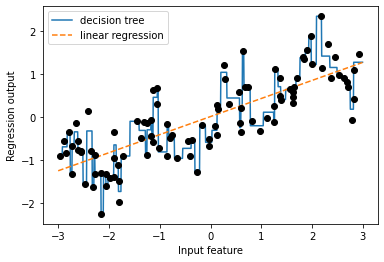

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import mglearn

X , y = mglearn.datasets.make_wave(n_samples = 100)
line = np.linspace(-3 , 3 , 1000 , endpoint = False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X , y)
plt.plot(line , reg.predict(line) , label = 'decision tree')

reg = LinearRegression().fit(X , y)
plt.plot(line , reg.predict(line) , label = 'linear regression' , linestyle = '--' )

plt.plot(X[:, 0] , y ,  'o' , c = 'k' )
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc = 'best')
plt.show()

In [37]:
# 线性模型只能对线性关系建模 ,对于单个特征的情况就是直线
# 决策树可以构建更为复杂的数据类型 ,但这强烈依赖于数据表示

# 有一种方法可以让线性模型在连续数据上变得更加强大
# 那就是使用特征分箱(binning ,也叫离散化 ,即discretization)将其划分为多个特征

In [38]:
bins = np.linspace(-3 , 3 , 11)
print('bins:{}'.format(bins))

bins:[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [39]:
# 记录每个数据点所属的箱子
# 使用np.digitize 函数轻松计算出来

which_bin = np.digitize(X , bins = bins)
print('\nData points:\n' , X[:5])
print('\nBin membership for data points:\n' , which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [40]:
# 在这里做的是将wave数据集中单个连续输入特征变换为一个分类特征 ,用于表示数据点所在的箱子
# 利用preprocessing 模块的 OneHotEncoder 将这个离散特征变换为 one-hot 编码
# OneHotEncoder 实现的编码与 pandas.get_dummies 相同 ,但目前它只适用于值为整数的分类变量

from sklearn.preprocessing import OneHotEncoder
# 使用OneHotEncoder 进行变换
encoder = OneHotEncoder(sparse = False)
# encoder.fit 找到which_bin 中唯一值
encoder.fit(which_bin)
# transform 创建one-hot编码
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [41]:
# 由于指定了10个箱子 ,所以变换后的X_binned 数据集现在包含10个特征
print('X_binned.shape:{}'.format(X_binned.shape))

X_binned.shape:(100, 10)


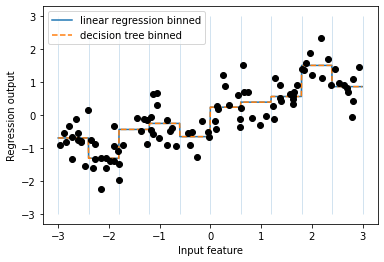

In [42]:
line_binned = encoder .transform(np.digitize(line , bins = bins))

reg = LinearRegression().fit(X_binned ,y)
plt.plot(line , reg.predict(line_binned) ,label = 'linear regression binned')

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned , y)
plt.plot(line , reg.predict(line_binned) , label = 'decision tree binned' , linestyle = '--')
plt.plot(X[:, 0] , y , 'o' , c = 'k')
plt.vlines(bins , -3 , 3 , linewidth = 1 , alpha = 0.2)
plt.legend(loc = 'best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.show()

In [43]:
# 虚数和实线完全重合 ,说明线性回归模型和决策树做出了完全相同的预测
# 对于每个箱子 ,二者都预测一个常数值
# 因为每个箱子内的特征是不变的
# 所以对于一个箱子内的所有点 ,任何模型都会预测相同的值

# 比较对特征进行分箱前后模型学到的内容 ,发现 线性模型变得更加灵活了 
# 因为现在它对每个箱子具有不同的取值 ,而决策树模型的灵活性降低了

# 分箱特征对基于树的模型通常不会产生更好的效果 ,因为这种模型可以学习在任何位置划分数据
# 从某种意义上来看 ,决策树可以学习如何分箱对预测这些数据最为有用
# 此外 ,决策树可以同时查看多个特征 ,而分箱通常针对的是单个特征
# 不过 ,线性模型的变现里在数据变换后得到了极大的提升

# 对于特定的数据集 ,如果又充分的理由使用线性模型
# 比如数据集很大、维度很高 ,但有些特征与输出的关系是非线性的
# 那么分箱是提高建模能力的好方法

## 交互特征与多项式特征

In [44]:
# 想要丰富特征表示 ,特别是对于线性模型而言 
# 另一种方法是添加原始数据的交互特征(interaction feature) 和多项式特征(polynomial feature)
# 这种特征工程通常用于统计建模 ,但也常用于许多实际的机器学习应用中

In [45]:
# 线性模型对wave数据集中的每个箱子都学到一个常数值
# 线性模型不仅可以学习偏移 ,还可以学习斜率
# 想要向分箱数据上的线性模型添加斜率 ,一种方法是重新加入原始特征(图中的x轴)
# 这样会得到11维的数据集

X_combined = np.hstack([X, X_binned])
print(X_binned.shape)

(100, 10)


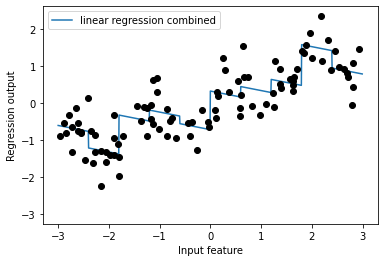

In [46]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, -3], ':', c='k')
    
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [47]:
# 模型在每个箱子中都学到一个偏移 ,还学到一个斜率
# 学到的斜率是向下的 ,并且在所有箱子中都相同 - 只有一个x轴特征 ,也就是一个斜率

# 因为斜率在所有箱子中是相同的 ,所以它似乎不是很有用
# 更希望每个箱子都有一个不同的斜率

# 为了实现这一点 ,可以添加交互特征或乘积特征 ,用来表示数据点所在的箱子以及数据在x轴上的位置
# 这个特征是箱子指示符与原始特征的乘积

In [48]:
X_product = np.hstack([X_binned , X * X_binned])
print(X_product.shape)

(100, 20)


In [49]:
# 数据点所在箱子的指示符与原始特征和箱子指示符的乘积
# 可以将乘积特征看作每个箱子x轴特征的单独副本
# 它在箱子内等于原始特征 ,在其他位置等于零

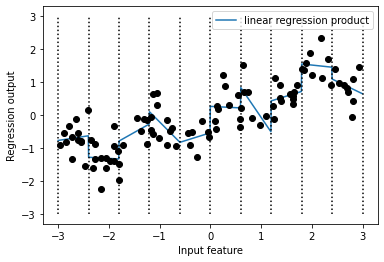

In [50]:
reg = LinearRegression().fit(X_product , y)

line_product = np.hstack([line_binned , line * line_binned])
plt.plot(line , reg.predict(line_product) , label = 'linear regression product')

for bin in bins :
    plt.plot([bin ,bin] , [-3 ,3] , ':' , c = 'k')
    
plt.plot(X[:, 0] , y , 'o' ,c = 'k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc = 'best')
plt.show()

# 这个模型中每个箱子都有自己偏移和斜率

In [51]:
# 使用分箱是扩展连续特征的一种方法
# 另一种方法是使用原始特征的多项式(polynomial)
# 对于给定特征x ,可以考虑 x ** 2 , x ** 3 , x ** 4
# 在preprocessing 模块的polynomialFeatures 中实现

from sklearn.preprocessing import PolynomialFeatures

# 包含直到 x ** 10 的多项式
# 默认的'include_bias = True'添加恒等于1 的常数特征
poly = PolynomialFeatures(degree = 10 , include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

In [52]:
print('X_poly.shape :{}'.format(X_poly.shape))

X_poly.shape :(100, 10)


In [53]:
# 比较X_poly 和 X 的元素 :
import numpy as np 
np.set_printoptions(suppress = True)

print('Entries of X :\n{}'.format(X[:5]))
print('Entries of X_poly :\n{}'.format(X_poly[:5]))

Entries of X :
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly :
[[   -0.75275929     0.56664654    -0.42654845     0.32108831
     -0.2417022      0.18194358    -0.13695972     0.1030977
     -0.07760775     0.05841996]
 [    2.70428584     7.3131619     19.77688015    53.48233692
    144.63152634   391.12498847  1057.71376738  2860.36036226
   7735.23202055 20918.27841037]
 [    1.39196365     1.93756281     2.697017       3.75414962
      5.22563982     7.27390068    10.12500534    14.0936394
     19.61783376    27.3073115 ]
 [    0.59195091     0.35040587     0.20742307     0.12278428
      0.07268226     0.04302433     0.02546829     0.01507598
      0.00892424     0.00528271]
 [   -2.06388816     4.25963433    -8.79140884    18.14448459
    -37.44818687    77.28886939  -159.51558224   329.22232109
   -679.47804963  1402.36669982]]


In [54]:
# 调用get_feature_names 方法来获取特征的语义 ,给出每个特征的指数
print('Polynomial feature names:{}'.format(poly.get_feature_names()))

Polynomial feature names:['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [55]:
# X_poly 的第一列与X 完全对应 ,而其他列则是第一列的幂
# 可以发现有些值特别大 ,第二行有大于20000的元素 ,数量级与其他行都不相同

# 将多项式特征与线性回归模型一起使用 ,可以得到经典的多项式回归(polynomial regression)模型

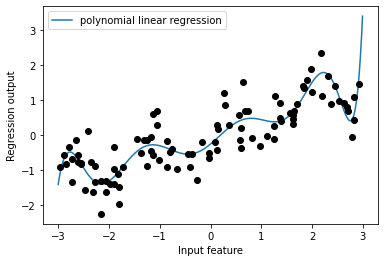

In [56]:
reg = LinearRegression().fit(X_poly , y)

line_poly = poly.transform(line)
plt.plot(line , reg.predict(line_poly) , label = 'polynomial linear regression')
plt.plot(X[:, 0] , y , 'o' , c = 'k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc = 'best')
plt.show()

In [57]:
# 多项式特征在这个一维数据上得到了非常平滑的拟合
# 但高次多项式在边界上或数据很少的区域可能有极端的表现

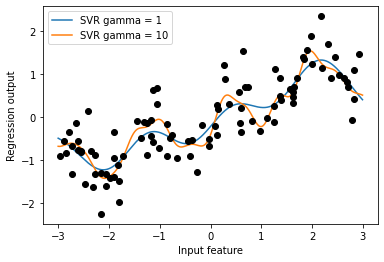

In [58]:
# 作为对比 ,在原始数据上学到的核SVM模型 ,没有做任何改变

from sklearn.svm import SVR

for gamma in [1 , 10]:
    svr = SVR(gamma = gamma).fit(X , y)
    plt.plot(line , svr.predict(line) , label = 'SVR gamma = {}'.format(gamma))
    
plt.plot(X[:, 0] , y , 'o' , c = 'k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc = 'best')
plt.show()

In [59]:
# 使用更加复杂的模型 (即核SVM) ,能够学到一个与多项式回归的复杂度类似的预测结果 ,且不需要进行显式的特征变换

In [60]:
# 观察特征的构造方式 ,以及多项式特征的帮助有多大
# 首先加载数据 ,然后利用MinMaxScaler将其缩放到0 和 1 之间

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train , X_test , y_train , y_test = train_test_split(boston.data , boston.target , random_state = 0)

# 缩放数据
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 提取多项式特征和交互特征 ,次数最高为2
poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print('X_train.shape :{}'.format(X_train.shape))
print('X_train_poly.shape :{}'.format(X_train_poly.shape))

X_train.shape :(379, 13)
X_train_poly.shape :(379, 105)


In [61]:
# 原始数据有13个特征 ,现在被扩展到105个交互特征
# 这些新特征表示两个不同的原始特征之间所有可能的交互项 ,以及每个原始特征的平方
# degree = 2 的意思是 ,需要由最多两个原始特征的乘积组成的所有特征

In [62]:
# 利用 get_feature_names 方法可以得到输入特征和输出特征之间的确切对应关系

print('polynomial feature names:\n{}'.format(poly.get_feature_names()))

polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [63]:
# 第一个新特征是常数特征 ,这里名称是'1' 
# 接下来的13个特征是原始特征(名称从'x0'到 'x12')
# 然后是第一个特征的平方('x0 ^ 2')以及与其他特征的组合

In [64]:
# 对Ridge 在有交互特征的数据上和没有交互特征的数据上的性能进行对比

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled , y_train)
print('Score without interaction :{:.3f}'.format(ridge.score(X_test_scaled , y_test)))
ridge = Ridge().fit(X_train_poly , y_train)
print('Score with interactions :{:.3f}'.format(ridge.score(X_test_poly , y_test)))

Score without interaction :0.577
Score with interactions :0.741


In [65]:
# 显然 ,在使用Ridge时 ,交互特征和多项式特征对性能有很大提升
# 但如果使用更加复杂的模型(比如随机森林) ,情况会稍有不同

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100).fit(X_train_scaled , y_train)
print('Score without interactions :{:.3f}'.format(rf.score(X_test_scaled , y_test)))

rf = RandomForestRegressor(n_estimators = 100).fit(X_train_poly , y_train)
print('Score with interactions :{:.3f}'.format(rf.score(X_test_poly , y_test)))

# 即使没有额外的特征 ,随机森林的性能也要优于Ridge
# 添加交互特征和多项式特征实际上会略微降低其性能

Score without interactions :0.813
Score with interactions :0.750


## 单变量非线性变换

In [66]:
# 添加特征的平方或立方可以改进线性回归模型
# 其他变换通常也对变换某些特征有用 ,特别是应用数据函数 ,比如log、exp或sin
# 虽然基于树的模型只关注特征的顺序 ,但线性模型和神经网络依赖于每个特征的尺度和分布
# 如果在特征和目标之间存在非线性关系 ,那么建模就变得非常困难 ,特别时对于回归问题
# log 和 exp函数可以帮助调节数据的相对比例 ,从而改进线性模型或神经网络的学习效果
# 在处理具有周期性模式的数据时 ,sin 和 cos 函数非常有用

In [67]:
# 大部分模型都在每个特征(在回归问题中还包括目标值)大致遵循高斯分布时表现最好
# 也就是说 ,每个特征的直方图应该具有类似于熟悉的'钟形曲线'的形状

# (log , exp)在一种特别常见的情况下 ,这样的变换非常有用 ,就是处理整数计数数据时
# 计数数据是指类似'用户A多长时间登录一次'这样的特征
# 计数不可能取负值 ,并且通常遵循特定的统计模式

In [68]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000 ,3))
w = rnd.normal(size = 3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org , w)

In [69]:
# 观察第一个特征的前10个元素 
# 它们都是正整数 ,但除此值外很难找出特定的模式

# 计算每个值出现的次数 ,那么数值的分布将变得更清楚
print('Number of feature appearances:\n{}'.format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


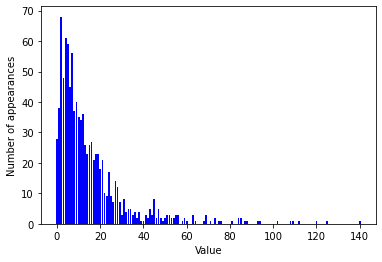

In [70]:
# 数字2似乎是最常见的 ,共出现了68次(bincount始终从0开始) ,更大的数字的出现次数快速下降

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)) , bins ,color = 'b')
plt.ylabel('Number of appearances')
plt.xlabel('Value')
plt.show()

In [71]:
# 特征X[:, 1] 和 X[:, 2] 具有类似的性质
# 这种类型的数值分布 (许多较小的值和一些非常大的值)在实践中非常常见
# 但大多数线性模型无法很好地处理这种数据

# 尝试拟合一个岭回归模型

from sklearn.linear_model import Ridge
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 0)
score = Ridge().fit(X_train , y_train).score(X_test , y_test)
print('Test score :{:.3f}'.format(score))

Test score :0.622


In [72]:
# 可以从相对较小的R^2分数中看出 ,Ridge无法真正捕捉到X和y之间的关系
# 不过应用对数变换可能有用
# 由于数据取直中包括0 (对数在0处没有定义),所以不能直接应用log ,而是要计算log(X + 1)

X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

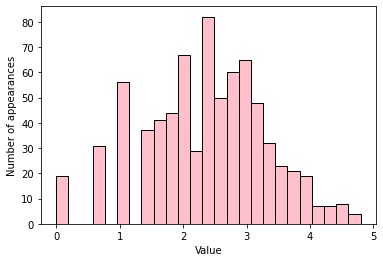

In [73]:
# 变换之后 ,数据分布的不对称性变小 ,也不再有非常大的异常值

plt.hist(X_train_log[:, 0] , bins = 25 , color = 'pink' , edgecolor = 'black')
plt.ylabel('Number of appearances')
plt.xlabel('Value')
plt.show()

In [74]:
# 在新数据上构建一个岭回归模型 ,可以得到更好的拟合

score = Ridge().fit(X_train_log , y_train).score(X_test_log , y_test)
print('Test score:{:.3f}'.format(score))

Test score:0.875


In [75]:
# 为数据集和模型的所有组合寻找最佳变换 ,这在某种程度上是一门艺术
# 在这个例子中 ,所有特征都具有相同的性质 ,这在实践中是非常少见的
# 通常来说 ,只有一部分特征应该进行变换 ,有时每个特征的变换方式也各不相同
# 对基于树的模型而言 ,这种变换并不重要 ,但对线性模型来说可能至关重要
# 对回归的目标变量y进行变换有时也是一个好主意
# 尝试预测计数(比如订单数量)是一项相当常见的任务 ,而且使用log(X + 1)变换也往往有用

# 从前面的例子中可以看出 ,分箱 ,多项式核交互项都对模型在给定数据集上的性能有很大影响
# 对于复杂度较低的模型更是这样 ,比如线性模型和朴素贝叶斯模型
# 与之相反 ,基于树的模型通常能够自己发现交互项 ,大多数情况下不需要显式地变换数据
# 其他模型 ,比如SVM、最近邻和神经网络 ,有时可能会从使用分箱 ,交互项或多项式中收益 ,但其效果通常不如线性模型那么显眼

## 自动化特征选择

In [76]:
# 若想要增大数据的维度 ,使其远大于原始特征的数量
# 但是 ,添加更多特征会使所有模型变得更加复杂 ,从而增大过拟合的可能性
# 在添加新特征或处理一般的高维度数据集时 ,最好将特征的数量减少到只包含最有用的那些特征 ,并删除其余特征
# 这样会得到泛化能力更好 ,更简单的模型

# 但你如何判断每个特征的作用有多大呢？
# 有三种基本的策略: 单变量统计(univariate statistics)、基于模型的选择(model-based selection) 和迭代选择(iterative selection)

# 所有这些方法都是监督方法 ,即它们需要目标值来拟合模型
# 这也就是说 ,需要将数据划分为训练集和测试集 ,并只在训练集上拟合特征选择

### 单变量统计

In [77]:
# 在单变量统计时 ,计算每个特征和目标值之间的关系是否存在统计显著性 ,然后选择具有最高置信度的特征
# 对于分类问题 ,这也被成为方差分析(analysis of variance ,ANOVA)
# 这些测试的一个关键性质就是它们是单变量的(univariate),即它们只单独考虑每个特征
# 因此 ,如果一个特征只有在与另一个特征合并时才具有信息量 ,那么这个特征将被舍弃
# 单变量测试的计算速度通常很快 ,并且不需要构建模型 
# 另一方面 ,它们完全独立于你可能想要在特征选择之后应用的模型

In [78]:
# 想要在scikit-learn 中使用单变量特征选择 ,你需要选择一项测试
# 对分类问题通常是f_classif(默认值) ,对回归问题通常是f_regression
# 然后基于测试中确定的p值来选择一种舍弃特征的方法
# 所有舍弃参数的方法都使用阈值来舍弃所有p值过大的特征(意味着它们不可能与目标值相关)
# 计算阈值的方法各有不同 ,最简单的是SelectKBest 和SelectPercentile
# 前者选择固定数量的k个特征 ,后者选择固定百分比的特征

# 将分类的特征选择应用于cancer数据集
# 为了使任务更难一点 ,将向数据中添加一些没有信息量的噪声特征
# 期望特征选择能够识别没有信息量的特征并删除它们

In [79]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 获得确定性的随机数
rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data) , 50))
# 向数据中添加噪声特征
# 前30个特征来自数据集 ,后50个是噪声
X_w_noise = np.hstack([cancer.data , noise])

X_train , X_test , y_train , y_test = train_test_split(X_w_noise , cancer.target , random_state = 0 , test_size = 0.5)
# 使用f_classif(默认值)和SelectPercentile 来选择50%的特征
select = SelectPercentile(percentile = 50)
select.fit(X_train , y_train)
# 对训练集进行变换
X_train_selected = select.transform(X_train)

print('X_train.shape:{}'.format(X_train.shape))
print('X_train_selected.shape:{}'.format(X_train_selected.shape))

X_train.shape:(284, 80)
X_train_selected.shape:(284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


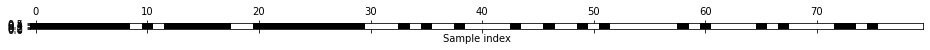

In [80]:
# 特征的数量从80 减少到 40(原始特征数量的50%)
# 可以用get_support 方法来查看哪些特征被选中 ,他会返回所选特征的布尔遮罩(mask)

mask = select.get_support()
print(mask)
# 将这招可视化-黑色为True ，白色为False
plt.matshow(mask.reshape(1 , -1) , cmap = 'gray_r')
plt.xlabel('Sample index')
plt.ylim(0,0.5)
plt.show()

In [81]:
# 可以从这招的可视化中看出 ,大多数所选择的特征都是原始特征 ,并且大多数噪声特征都已被删除
# 但原始特征的而还原并不完美

In [82]:
# 比较Logistic归回在所有特征上的性能与仅使用所选特征的性能

from sklearn.linear_model import LogisticRegression

# 对测试数据进行变换
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train , y_train)
print('Score with all feature:{:.3f}'.format(lr.score(X_test , y_test)))
lr.fit(X_train_selected , y_train)
print('Score with only selected features:{:.3f}'.format(lr.score(X_test_selected , y_test)))

Score with all feature:0.930
Score with only selected features:0.937


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [83]:
# 在这个例子中,删除噪声特征可以提高性能 ,即使丢失了某些原始特征
# 这是一个非常简单的假象实例 ,在真实数据上的结果要更加复杂
# 不过 ,如果特征量太大以至于无法构建模型 ,或者你怀疑许多特征完全没有信息量 ,那么单变量特征选择还是非常有用的

### 基于模型的特征选择

In [84]:
# 基于模型的特征选择使用一个监督机器学习模型来判断每个特征的重要性 ,并且仅保留最重要的特征
# 用于特征选择的监督模型不需要与用于最终监督建模的模型相同
# 特征选择模型需要为每个特征提供某个重要性度量 ,以便用这个度量对特征进行排序

# 决策树和基于决策树的模型提供了feature_importances_属性 ,可以直接编码每个特征的重要性
# 线性模型系数的绝对值也可以用于表示特征重要性

# L1 惩罚的线性模型学到的是稀疏系数 ,它只用到了特征的一个很小的子集
# 这可以被视为模型本身的一种特征选择形式 ,但也可以用作另一个模型选择特征的预处理步骤
# 与单变量选择不同 ,基于模型的选择同时考虑所有特征 ,因此可以获取交互项
# 要想使用基于模型的特征选择 ,需要使用SelectFromModel变换器

In [85]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators = 100 , random_state = 42),threshold = 'median')

In [86]:
# SelectFromModel 类选出重要性度量(由监督模型提供)大于给定阈值的所有特征
# 为了得到可以与便变量特征选择进行对比的结果 ,使用中位数作为阈值 ,这样就可以选择一半特征

# 使用包含100棵树的随机森林分类器来计算特征重要性
# 这是相当复杂的模型 ,也比单变量测试要强大的多
# 拟合实际模型

select.fit(X_train , y_train)
X_train_l1 = select.transform(X_train)
print('X_train.shape:{}'.format(X_train.shape))
print('X_train_l1.shape:{}'.format(X_train_l1.shape))

X_train.shape:(284, 80)
X_train_l1.shape:(284, 40)


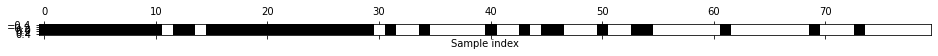

In [87]:
mask = select.get_support()
# 将遮罩可视化-黑色为True ,白色为False
plt.matshow(mask.reshape(1 ,-1) , cmap = 'gray_r')
plt.xlabel('Sample index')
plt.show()

In [88]:
# 除了两个原始特征 ,其他原始特征都被选中
# 由于指定选择40个特征 ,所以也选择了一些噪声特征

In [89]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter = 5000).fit(X_train_l1 , y_train).score(X_test_l1 , y_test)
print('Test score :{:.3f}'.format(score))

# 利用更好特征选择 ,性能也得到了提高

Test score :0.947


### 迭代特征选择

In [90]:
# 在单表测试中 ,没有使用模型 ,而在基于模型的选择中 ,使用了单个模型来选择特征
# 在迭代特征选择中 ,将会构建一系列模型 ,每个模型都使用不同数量的特征

# 有两种基本方法 :
# 开始时没有特征 ,然后逐个添加特征 ,直到满足某个终止条件
# 或者从所有特征开始 ,然后逐个删除特征 ,直到满足某个终止条件

# 由于构建了一系列模型 ,所以这些方法的计算成本要比前面讨论过的方法更高

# 其中一种特殊方法是递归特征消除(recursive feature elimination , RFE)
# 它从所有特征开始构建模型 ,并根据模型舍弃最不重要的特征 ,然后使用除被舍弃特征之外的所有特征来构建一个新模型 
# 如此继续 ,直到仅剩下预设数量的特征

# 为了让这种方法能够运行 ,用于选择的模型需要提供某种确定特征重要性的方法
# 正如基于模型的选择所做的那样 

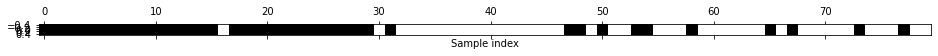

In [91]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators = 100 ,random_state = 42) , n_features_to_select = 40)
select.fit(X_train , y_train)
# 将选中的特征可视化:
mask = select.get_support()
plt.matshow(mask.reshape(1 , -10) , cmap = 'gray_r')
plt.xlabel('Sample index')
plt.show()

In [92]:
# 与单变量选择和基于模型的选择相比 ,迭代特征选择的结果更好 ,但仍然漏掉了一个特征
# 运行上述代码需要的实践也比基于模型的选择长很多
# 因为对一个随机森林模型训练了40次 ,每运行一次删除一个特征

In [93]:
# 测试使用RFE做特征选择时Logistic回归模型的精度

X_train_rfe = select.transform(X_train)
X_test_rge = select.transform(X_test)

score = LogisticRegression(max_iter = 5000).fit(X_train_rfe , y_train).score(X_test_rge , y_test)
print('Test score :{:.3f}'.format(score))

Test score :0.940


In [94]:
# 这里 ,在RFE 内部使用的随机森林的性能 ,与在所选特征上训练一个Logistic 回归模型得到的性能相同
# 换句话说 ,只要选择了正确的特征 ,线性模型的表现就与随机森林一样好

# 如果不确定何时选择有用哪些特征作为机器学习算法的输入 ,那么自动化特征选择可能特别有用
# 它还有助于减少需要的特征数量 ,加快预测速度 ,或允许可解释性更强的模型
# 在大多数现实情况下 ,使用特征选择不太可能大幅提升性能 ,但它仍是特征工程工具箱中一个非常有价值的工具

## 利用专家知识

In [95]:
# 对于特定应用来说 ,在特征工程中通常可以利用专家知识 (expert konwledge)
# 虽然在许多情况下 ,机器学习的目的是避免创建一组专家设计的规则 , 但这并不意味着应该舍弃该应用或该领域的先验知识
# 通常来说 ,领域专家可以帮助找出有用的特征 ,其信息量比数据原始表示要大得多

# 添加一个特征并不会强制机器学习算法使用它 ,即使最终发现假日信息不包含关于机票价格的信息 ,用这一信息来扩充数据也不会有什么害处

In [96]:
citibike = mglearn.datasets.load_citibike()

print('Citi Bike data :\n{}'.format(citibike.head()))

Citi Bike data :
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


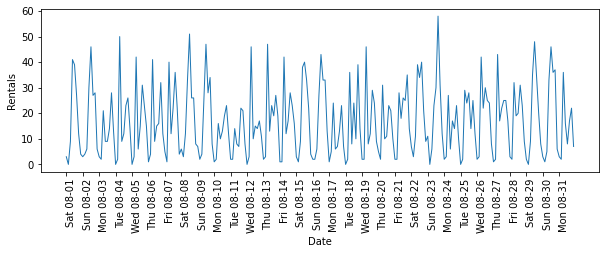

In [97]:
# 整个约租车数量可视化

plt.figure(figsize = (10 , 3))
xticks = pd.date_range(start = citibike.index.min() , end = citibike.index.max() , freq = 'D')
plt.xticks(xticks , xticks.strftime('%a %m-%d') , rotation = 90 , ha = 'left')
plt.plot(citibike , linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Rentals')
plt.show()

In [98]:
# 观察此数据 ,可以清楚地区区分每24小时中的白天和夜间
# 工作日和周末的模式似乎也有很大不同
# 在对这种时间序列上的预测任务进行评估时 ,可以通常希望从过去学习并预测未来
# 也就是说 ,在划分训练集和测试集的时候 , 希望使用某个特定日期之前的所有数据作为训练集 ,该日期之后的所有数据作为测试集

# 这是通常使用时间序列预测的方式:
# 已知过去所欲的出租数据 ,认为明天会发生什么?
# 将使用前184个数据点(对应前23天)作为训练集 ,剩余的64个数据点(对应剩余的8天)作为测试集

In [99]:
# 在预测任务中 ,使用的唯一特征就是某一租车数量对应的日期和时间 ,因此输入特征是日期和时间

# 在计算机上存储日期的常用方式是使用POSIX时间
# 它是从1970年1月1日 00:00:00 (也就是Unix时间的起点)起至现在的总秒数

In [100]:
# 首先 ,可以尝试使用这个单一整数特征作为数据表示

# 提取目标值(租车数量)
y = citibike.values
# 利用'%s'将时间转换为POSIX时间
X = citibike.index.astype("int").values.reshape(-1, 1)

In [106]:
n_train = 184
# 使用前184个数据点用于训练 ,剩余的数据点用于测试
def eval_on_feature(features , target , regressor):
    # 将给定特征划分为训练集和测试集
    X_train , X_test = features[:n_train] , features[n_train:]
    # 同样划分目标数组
    y_train , y_test = target[:n_train] , target[n_train :]
    regressor.fit(X_train , y_train)
    print('Test-set R^2:{:.2f}'.format(regressor.score(X_test , y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10 ,3))
    
    plt.xticks(range(0 , len(X) ,8) , xticks.strftime('%a %m-%d') , rotation = 90 , ha = 'left')
    
    plt.plot(range(n_train) ,y_train , label = 'train')
    plt.plot(range((n_train) ,len(y_test) + n_train) , y_test, '-' , label = 'test')
    plt.plot(range(n_train) ,y_pred_train , '--' , label = 'prediction train')
    plt.plot(range(n_train ,len(y_test) + n_train) , y_pred , '--' , label = 'prediction test')
    plt.legend(loc = (1.01 , 0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')
    plt.show()

In [107]:
# 随机森林需要很少的数据预处理 ,因此它似乎很适合作为第一个模型
# 使用POSIX时间特征X　,并将随机森林回归传入我们的eval_on_features 函数

Test-set R^2:-0.04


<Figure size 432x288 with 0 Axes>

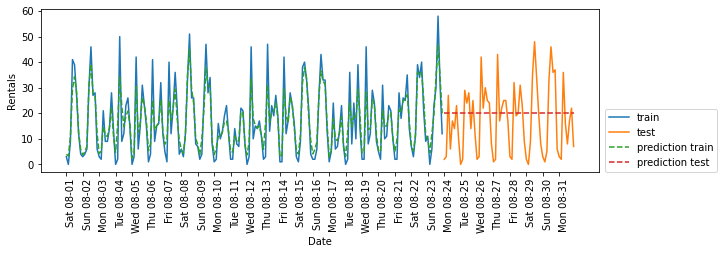

In [109]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
plt.figure()
eval_on_feature(X, y, regressor)
plt.show()

In [ ]:
# 在训练集上的预测结果相当好 ,这符合随机森林通常的表现
# 但对于测试集来说 ,预测结果是一条常数直线
# R^2 说明什么都没有学到 ,发生了什么

In [ ]:
# 问题在于特征和随机森林的组合
# 测试集中POSIX 时间特征的值超出了训练集中特征取值的范围
# 测试集中数据点的时间戳要晚于训练集中的所有数据点
# 树以及随机森林无法外推(extrapolate)到训练集之外的特征范围
# 结果就是模型只能预测训练集中最近数据点的目标值 ,即最后一次观测到数据的时间

In [ ]:
# 通过观察训练数据中的租车数量图像 ,发现两个因素似乎非常重要
# 一天内的时间与一周的星期几
# 因此添加这两个特征
# 从POSIX时间中学不到任何东西 ,所以删掉这个特征

Test-set R^2:0.60


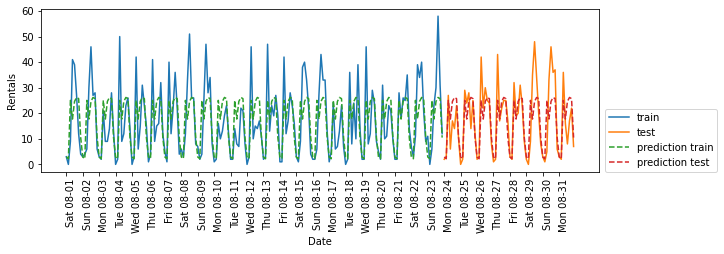

In [117]:
X_hour = citibike.index.hour.values.reshape(-1 , 1)
eval_on_feature(X_hour , y , regressor)

Test-set R^2:0.84


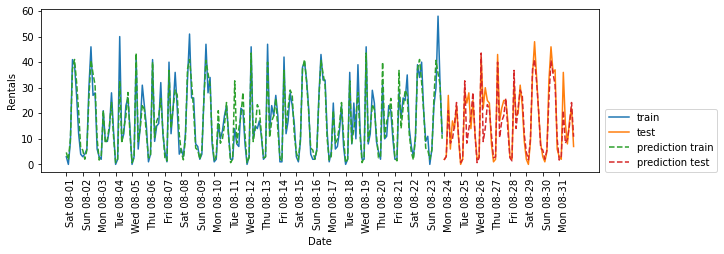

In [118]:
# R^2已经好多了 ,但预测结果显然没有抓出每周的模式
# 添加一周的星期几作为特征

X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1 ,1),citibike.index.hour.values.reshape(-1, 1)])
eval_on_feature(X_hour_week , y , regressor)

In [ ]:
# 现在的模型通过考虑一周的星期几和一天内的时间捕捉到了周期性的行为
# 它的R^2为0.84 ,预测性能相当好
# 模型学到的内容可能是8月前23天中星期几与时刻每种组合的平均租车数量
# 这实际上不需要像随机森林这样复杂的模型 ,所以尝试一个更简单的模型 - LinearRegression

Test-set R^2:0.13


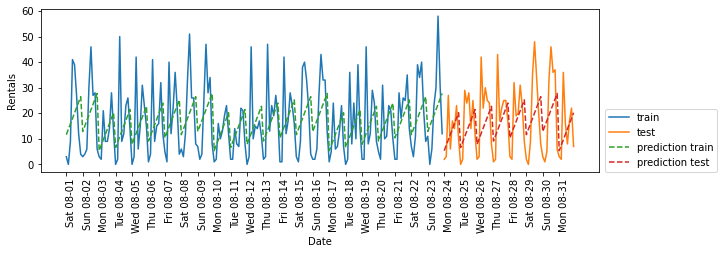

In [119]:
from sklearn.linear_model import LinearRegression
eval_on_feature(X_hour_week , y , LinearRegression())

In [ ]:
# LinearRegression 的效果差的多 ,而且周期性模型看起来很奇怪
# 其原因在于用整数编码一周的星期几和一天内的时间 ,它们被解释为连续变量

# 因此 ,线性模型只能学到关于每天时间的线性函数 - 他学到的是 ,时间越晚 ,租车数量越多
# 但实际模式比这要复杂的多
# 可以通过整数解释分类变量(用OneHotEncoder 进行变换)来获取这种模式

Test-set R^2:0.62


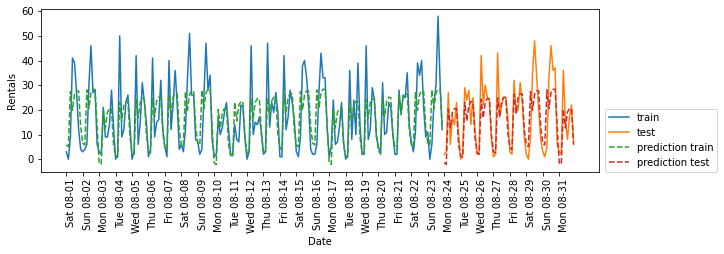

In [121]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_feature(X_hour_week_onehot ,y ,Ridge())

In [ ]:
# 它给出了比连续特征编码好得多的匹配
# 现在线性模型为一周内的每天都学到了一个系数 ,为一天内的每个时刻都学到了一个系数
# 也就是说 ,一周七天共享'一天内每个时刻'的模式

# 利用交互特征 ,可以让模型为星期几和时刻的每一种组合学到一个系数

Test-set R^2:0.85


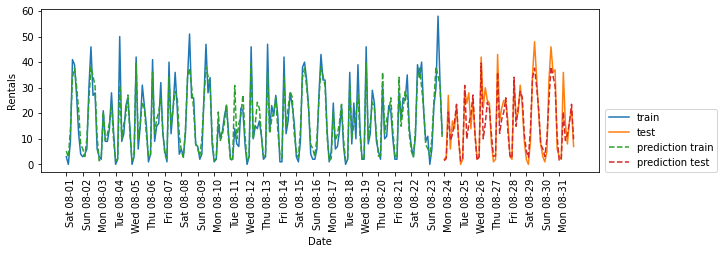

In [122]:
poly_transformer = PolynomialFeatures(degree = 2 ,interaction_only = True , include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_feature(X_hour_week_onehot_poly ,y ,lr)

In [ ]:
# 这一变换最终得到一个性能与随机森林类似的模型
# 这一模型的一大优点是
# 可以很清楚地看到学到的内容
# 对每个星期几和时刻的交互项学到了一个系数

# 可以将模型学到的系数作图 ,而这对于随机森林来说是不可能的

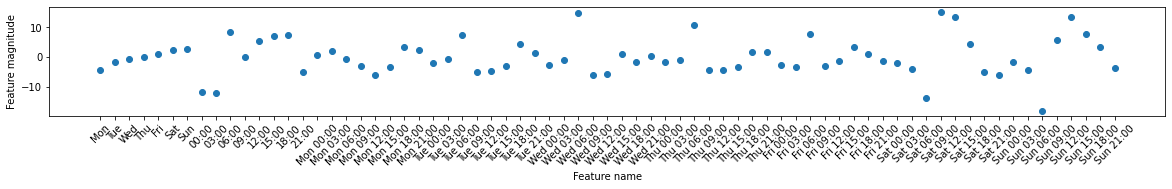

In [127]:
# 首先 ,为时刻和星期几特征创建特征名称:

hour = ['%02d:00' % i for i in range(0 ,24 ,3)]
day = ['Mon' ,'Tue' ,'Wed' ,'Thu' ,'Fri' ,'Sat' ,'Sun']
features = day + hour

# 然后利用get_feature_names 方法对PolynomialFeatures 提取的所有交互特征进行命名
# 并仅保存系数不为零的哪些特征

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

# 将线性模型学到的系数可视化
plt.figure(figsize = (20,2))
plt.plot(coef_nonzero , 'o')
plt.xticks(np.arange(len(coef_nonzero)) ,features_nonzero , rotation = 45)
plt.xlabel('Feature name')
plt.ylabel('Feature magnitude')
plt.show()

## 小结与展望

In [ ]:
# 本章讨论了如何处理不同的数据类型(特别是分类变量)
# 强调了使用适合机器学习算法的数据表示方法的重要性 ,例如one-hot 编码过的分类变量
# 还讨论了通过特征工程生成新特征的重要性 ,以及利用专家知识从数据中创建导出特征的可能性
# 特别是线性模型 ,可能从分箱、添加多项式和交互项而生成的新特征中大大收益
# 对于更加复杂的非线性模型(比如随机森林和SVM) ,在无需显式扩展特征空间的前提下就可以学习更加复杂的任务
# 在实践中 ,所使用的特征(以及特征与方法之间的匹配)通常是使机器学习方法表现良好的最重要因素

In [ ]:
# 本章学习如何适当的表示数据 ,以及对哪个任务使用哪种算法